# Credit Card Fraud Detection

By: Ing. Martin Farfan

https://www.kaggle.com/datasets/kartik2112/fraud-detection/data?select=fraudTrain.csv

# 1. IMPORT LIBRARIES

In [1]:
# DATA PROCESSING
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns #Python library for Visualization

# 2. READ THE DATA

Read from the kaggle API

In [ ]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('kartik2112/fraud-detection',
                                  path='./Data',
                                  unzip=False)

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
Archivos en el zip: ['fraudTest.csv', 'fraudTrain.csv']


Read from the zip file

In [9]:
import zipfile
import io

# Leer desde el zip sin extraer
with zipfile.ZipFile('./Data/fraud-detection.zip', 'r') as z:
    # Ver qué archivos hay
    print("Archivos en el zip:", z.namelist())

    # Leer directamente desde el zip
    with z.open('fraudTrain.csv') as f:
        fraudTrain_df = pd.read_csv(f)

    # Leer directamente desde el zip
    with z.open('fraudTest.csv') as f:
        fraudTest_df = pd.read_csv(f)

Archivos en el zip: ['fraudTest.csv', 'fraudTrain.csv']


In [11]:
fraudTrain_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# 3. CLEANING THE RAW DATASET

index - Unique Identifier for each row

trans_date_trans_time - Transaction DateTime

cc_num - Credit Card Number of Customer

merchant - Merchant Name

category - Category of Merchant

amt - Amount of Transaction

first - First Name of Credit Card Holder

last - Last Name of Credit Card Holder

gender - Gender of Credit Card Holder

street - Street Address of Credit Card Holder

city - City of Credit Card Holder

state - State of Credit Card Holder

zip - Zip of Credit Card Holder

lat - Latitude Location of Credit Card Holder

long - Longitude Location of Credit Card Holder

city_pop - Credit Card Holder's City Population

job - Job of Credit Card Holder

dob - Date of Birth of Credit Card Holder

trans_num - Transaction Number

unix_time - UNIX Time of transaction

merch_lat - Latitude Location of Merchant

merch_long - Longitude Location of Merchant

is_fraud - Fraud Flag <--- Target Class

## 3.1 Cleaning outsiders

## 3.2 Handling Missing Values

In [12]:
# Check for missing values
missing_values = fraudTrain_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


## 3.3 Cleaning the Dataset

In [77]:
dftrain = fraudTrain_df

In [78]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [76]:
fraudTrain_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Name'],
      dtype='object')

In [ ]:
#dftrain.job.unique()
#dftrain.city.unique()
#fraudTrain_df.cc_num.unique()

array([   2703186189652095,        630423337322,      38859492057661,
          3534093764340240,     375534208663984,    4767265376804500,
            30074693890476,    6011360759745864,    4922710831011201,
          2720830304681674,       4642894980163,     377234009633447,
           180042946491150,    5559857416065248,    3514865930894695,
          6011999606625827,    6011860238257910,    3565423334076143,
          2348245054386329, 4956828990005111019, 4469777115158234880,
          2305336922781618,     180048185037117,        630441765090,
       4428780983793657331,     343464013864032,     374930071163758,
          4334230547694630, 4225990116481262579,    4260059589824237,
           180094608895855, 4599735407877245080,        630412733309,
          2712209726293386,     374125201044065,     349612764943496,
          3598215285024754,     213141712584544,      30561214688470,
          4789911625179723,        676372984911,      30011465039817,
          4642255475

In [79]:
# calculate distances between the business and the buyer
# Define haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert to radians

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c  # Distance in km

dftrain['distance_km'] = haversine(dftrain['lat'], dftrain['long'], 
                                   dftrain['merch_lat'], dftrain['merch_long'])

dftrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Name,distance_km
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Jennifer Banks,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Edward Sanchez,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Jeremy White,95.673231
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tyler Garcia,77.556744


In [80]:
# take the age of the consumers

dftrain['trans_date_trans_time'] = pd.to_datetime(dftrain['trans_date_trans_time'])
dftrain['dob'] = pd.to_datetime(dftrain['dob'])
dftrain['age'] = dftrain['trans_date_trans_time'].dt.year - dftrain['dob'].dt.year

dftrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Name,distance_km,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,Jennifer Banks,78.597568,31
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Stephanie Gill,30.212176,41
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,Edward Sanchez,108.206083,57
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Jeremy White,95.673231,52
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,Tyler Garcia,77.556744,33


In [81]:
fraudTrain_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Name', 'distance_km', 'age'],
      dtype='object')

In [ ]:
# for the moment the zip and the street, for the EDA and the model is going to
#  be useful the state and the city population
dftrain = dftrain.drop(columns=['first', 'last', 'Name'])
dftrain = dftrain.drop(columns=['Unnamed: 0', 'trans_num', 'unix_time', 'cc_num'])
dftrain = dftrain.drop(columns=['lat', 'long', 'merch_lat', 'merch_long'])
dftrain = dftrain.drop(columns=['trans_date_trans_time', 'dob'])
dftrain = dftrain.drop(columns=['street', 'zip', 'city', 'merchant'])

In [89]:
dftrain = dftrain.drop(columns=['job'])

In [90]:
dftrain.head()

,category,amt,gender,state,city_pop,is_fraud,distance_km,age
0,misc_net,4.97,F,NC,3495,0,78.597568,31
1,grocery_pos,107.23,F,WA,149,0,30.212176,41
2,entertainment,220.11,M,ID,4154,0,108.206083,57
3,gas_transport,45.00,M,MT,1939,0,95.673231,52
4,misc_pos,41.96,M,VA,99,0,77.556744,33


REMEMBER TO DO THE DROP IN THE END (FOR NEXT TIME)

# 4. EXPLORATORY DATA ANALYSIS

## 4.1 Understand Column Meaning

In [93]:
dftrain.describe()

,amt,city_pop,is_fraud,distance_km,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,5.788652e-03,7.611465e+01,4.602930e+01
std,1.603160e+02,3.019564e+05,7.586269e-02,2.911693e+01,1.738237e+01
min,1.000000e+00,2.300000e+01,0.000000e+00,2.225452e-02,1.400000e+01
25%,9.650000e+00,7.430000e+02,0.000000e+00,5.533491e+01,3.300000e+01
50%,4.752000e+01,2.456000e+03,0.000000e+00,7.823175e+01,4.400000e+01
75%,8.314000e+01,2.032800e+04,0.000000e+00,9.850327e+01,5.700000e+01
max,2.894890e+04,2.906700e+06,1.000000e+00,1.521172e+02,9.600000e+01


category - Category of Merchant 
amt - Amount of Transaction
gender - Gender of Credit Card Holder
state - State of Credit Card Holder
city_pop - Credit Card Holder's City Population
distance_km <- distance in km 
age - age of the consumer
is_fraud - Fraud Flag <--- Target Class

In [95]:
dftrain.groupby('is_fraud').describe()

amt                                                            \
              count        mean         std   min       25%      50%      75%   
is_fraud                                                                        
0         1289169.0   67.667110  154.007971  1.00    9.6100   47.280   82.540   
1            7506.0  531.320092  390.560070  1.06  245.6625  396.505  900.875   

                     city_pop                ... distance_km              \
               max      count          mean  ...         75%         max   
is_fraud                                     ...                           
0         28948.90  1289169.0  88775.228137  ...   98.504498  152.117173   
1          1376.04     7506.0  97276.763256  ...   98.391090  144.522410   

                age                                                     
              count      mean        std   min   25%   50%   75%   max  
is_fraud                                                                
0         1289169.0  46.01278  17.372078  14.0  33.0  44.0  57.0  96.0  
1            7506.0  48.86624  18.856058  14.0  33.0  48.0  61.0  94.0  

[2 rows x 32 columns]

In [96]:
dftrain.category.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [98]:
dftrain[dftrain.is_fraud == 1].state.value_counts()

state
NY    555
TX    479
PA    458
CA    326
OH    321
FL    281
IL    248
MI    238
AL    215
MN    207
VA    198
SC    193
MO    191
NE    180
WI    163
AR    161
MD    157
KS    156
KY    155
OR    149
NC    149
GA    146
WV    146
OK    143
IN    142
IA    142
TN    140
ME    119
NJ    118
MS    115
CO    113
WY    110
WA     96
LA     91
NM     82
SD     74
VT     72
MA     69
UT     61
NH     59
ND     57
NV     47
AZ     37
AK     36
MT     32
DC     21
CT     16
RI     15
ID     11
DE      9
HI      7
Name: count, dtype: int64

There are too many states

In [101]:
def map_state_to_region(state):
    
    regions = {
        'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
        
        'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 
                  'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
        
        'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 
                    'ND', 'SD'],
        
        'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 
                 'HI', 'OR', 'WA']
    }
    
    for region, states in regions.items():
        if state in states:
            return region
    
    return 'Other'  # Para territorios o valores no reconocidos

dftrain['US_region'] = dftrain['state'].apply(map_state_to_region)

In [103]:
dftrain[dftrain.is_fraud == 1].US_region.value_counts()

US_region
South        2778
Midwest      2119
Northeast    1481
West         1107
Other          21
Name: count, dtype: int64

In [104]:
dftrain = dftrain.drop(columns='state')

In [106]:
dftrain[dftrain.is_fraud == 1].category.value_counts()

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

In [107]:
dftrain[dftrain.is_fraud == 1].gender.value_counts()

gender
M    3771
F    3735
Name: count, dtype: int64

In [105]:
dftrain.head()

,category,amt,gender,city_pop,is_fraud,distance_km,age,US_region
0,misc_net,4.97,F,3495,0,78.597568,31,South
1,grocery_pos,107.23,F,149,0,30.212176,41,West
2,entertainment,220.11,M,4154,0,108.206083,57,West
3,gas_transport,45.00,M,1939,0,95.673231,52,West
4,misc_pos,41.96,M,99,0,77.556744,33,South


## 4.2 Check Data Integrity

In [108]:
# Check for missing values
missing_values = dftrain.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
category       0
amt            0
gender         0
city_pop       0
is_fraud       0
distance_km    0
age            0
US_region      0
dtype: int64


## 4.3 Visualize Distributions

### 4.3.1 Basic Exploration

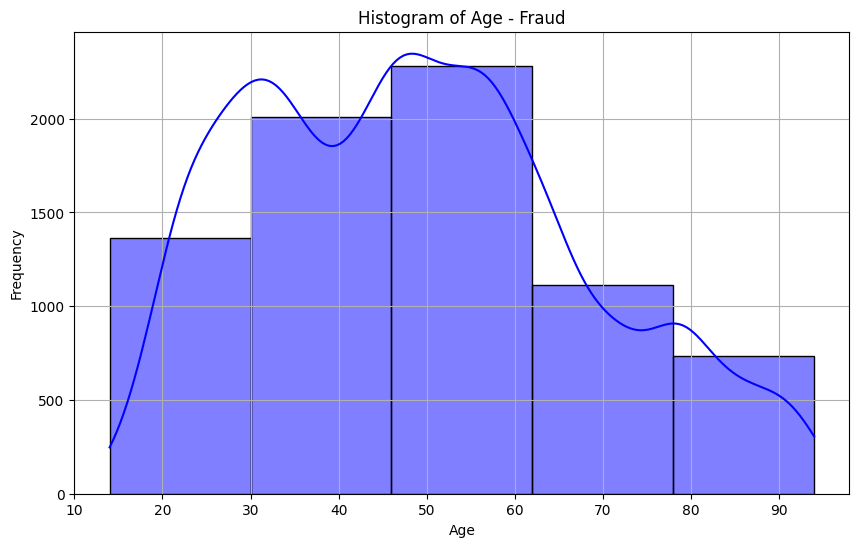

In [126]:
#histograms
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
sns.histplot(dftrain[dftrain.is_fraud == 1].age, color="b", kde = True, bins=5)
plt.title('Histogram of Age - Fraud')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

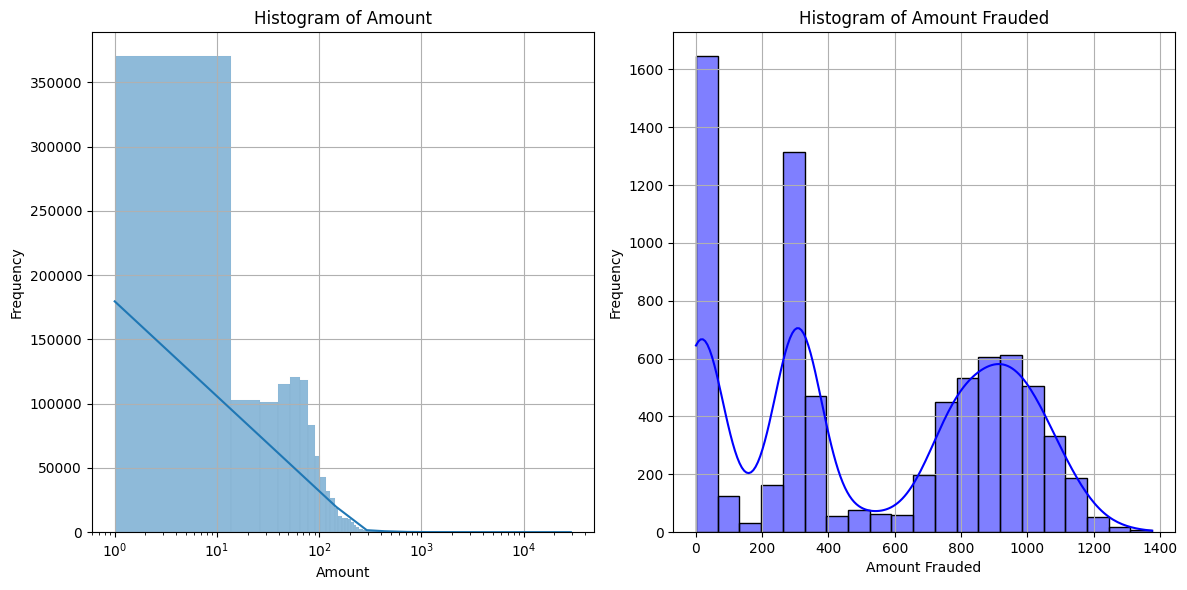

In [135]:
#histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(dftrain[dftrain.is_fraud == 0].amt, kde = True, ax=axs[0])
axs[0].set_xscale('log')
axs[0].set_title('Histogram of Amount')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

sns.histplot(dftrain[dftrain.is_fraud == 1].amt, color="b", kde = True, ax=axs[1])
axs[1].set_title('Histogram of Amount Frauded')
axs[1].set_xlabel('Amount Frauded')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

In [130]:
dftrain.groupby('is_fraud').amt.describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,67.667110,154.007971,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.560070,1.06,245.6625,396.505,900.875,1376.04


Insights:

- The mean and the median value of the amount ara aprox. 8 times higher in the fraudulent transaction than in the normal transaction
- The tail of the non-fraud is really heavy, which crushes almost the whole dataset.
- The distribution of the fraudulent transactions is very compacted, with three modes (low, mid and high frauds)

In [138]:
print((dftrain[dftrain.is_fraud == 0].amt < 100).sum())
print((dftrain[dftrain.is_fraud == 0].amt >= 100).sum())

1060076
229093


In [140]:
dftrain[dftrain.is_fraud == 0].amt.apply(np.log1p).describe()

count    1.289169e+06
mean     3.521620e+00
std      1.277828e+00
min      6.931472e-01
25%      2.361797e+00
50%      3.877017e+00
75%      4.425326e+00
max      1.027332e+01
Name: amt, dtype: float64

In [141]:
# Feature engineering (para el modelo)
dftrain['amt_log'] = np.log1p(dftrain['amt'])

In [143]:
dftrain.columns

Index(['category', 'amt', 'gender', 'city_pop', 'is_fraud', 'distance_km',
       'age', 'US_region', 'amt_log'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_23440\1501345543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dftrain.is_fraud,data=dftrain,palette="husl")


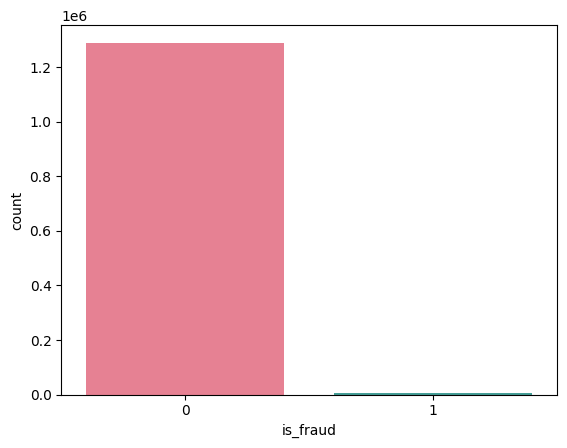

In [144]:
# countplots
sns.countplot(x=dftrain.is_fraud,data=dftrain,palette="husl")
plt.show()

It should be appropriate to do a downsize, if the case seems like so

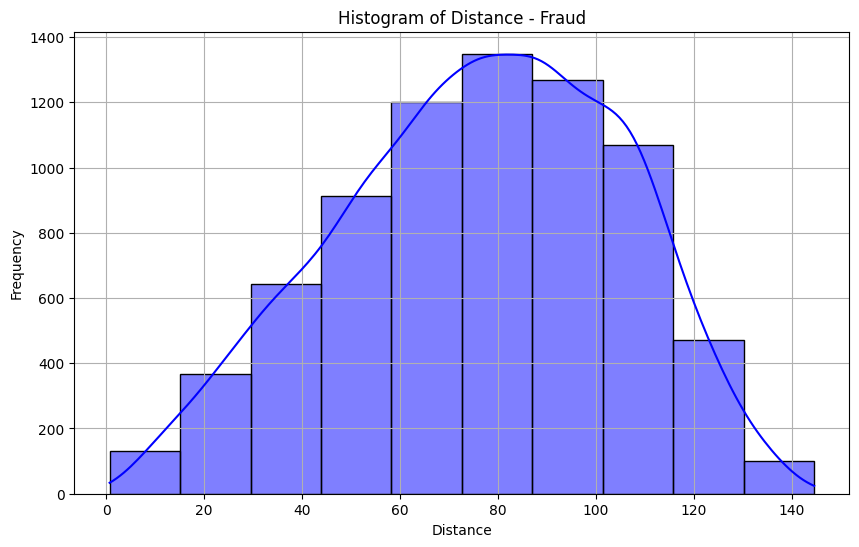

In [149]:
#histograms
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
sns.histplot(dftrain[dftrain.is_fraud == 1].distance_km, color="b", kde = True, bins=10)
plt.title('Histogram of Distance - Fraud')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [150]:
dftrain.groupby('is_fraud').distance_km.describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,76.113756,29.119051,0.022255,55.332701,78.233012,98.504498,152.117173
1,7506.0,76.268330,28.752602,0.738769,55.632890,77.931954,98.391090,144.522410


Distance is not that important in the case of frauds

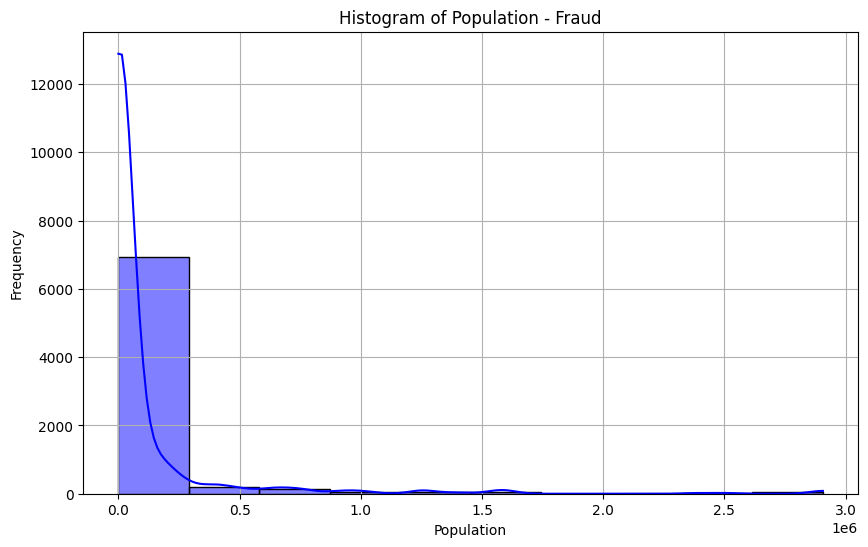

In [159]:
#histograms
plt.figure(figsize=(10,6)) #regula el tamaño, lo hace más grande
sns.histplot(dftrain[dftrain.is_fraud == 1].city_pop, color="b", kde = True, bins=10)
plt.title('Histogram of Population - Fraud')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

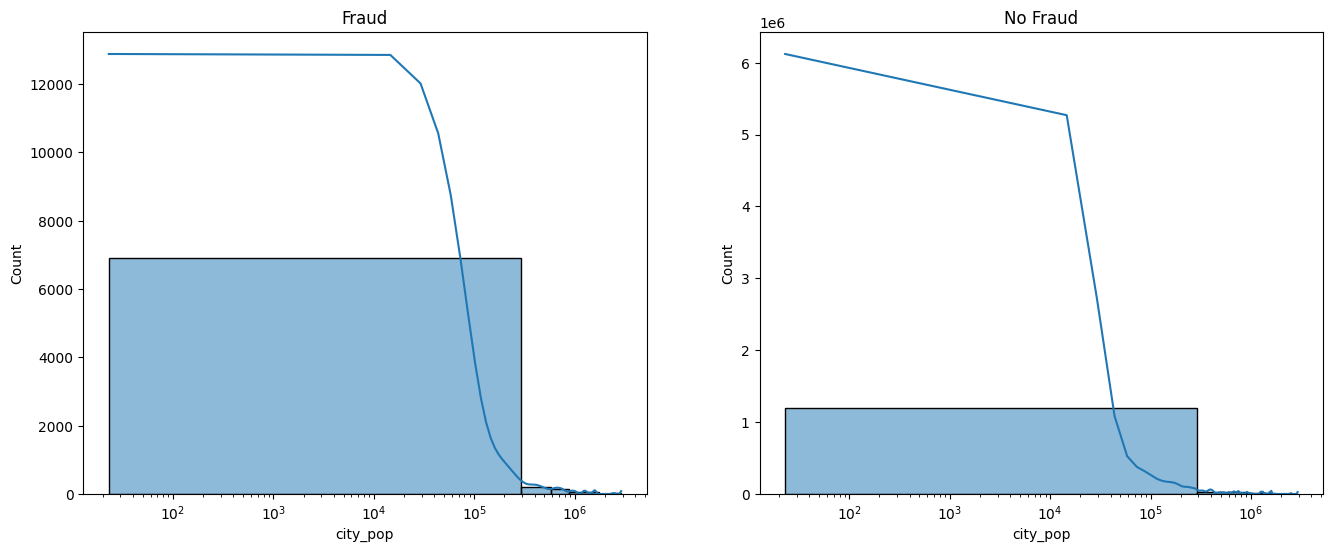

In [161]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Fraude
sns.histplot(dftrain[dftrain.is_fraud == 1].city_pop, kde=True, ax=axs[0], bins=10)
axs[0].set_title('Fraud')
axs[0].set_xscale('log')


# No-fraude
sns.histplot(dftrain[dftrain.is_fraud == 0].city_pop, kde=True, ax=axs[1], bins=10)
axs[1].set_title('No Fraud')
axs[1].set_xscale('log')

it can be seen that the majority of fraud transactions are on small cities

In [154]:
dftrain.groupby('is_fraud').city_pop.describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,88775.228137,301806.545204,23.0,743.0,2456.0,20328.0,2906700.0
1,7506.0,97276.763256,326581.466670,23.0,746.5,2623.0,21437.0,2906700.0


C:\Users\USER\AppData\Local\Temp\ipykernel_23440\1718579430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dftrain[dftrain.is_fraud == 1].gender,data=dftrain,palette="husl")


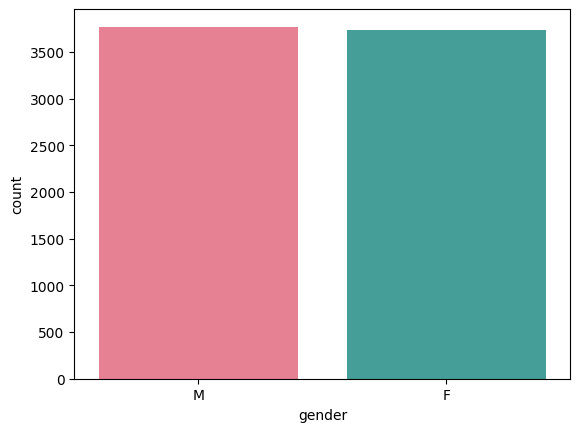

In [158]:
# countplots
sns.countplot(x=dftrain[dftrain.is_fraud == 1].gender,data=dftrain,palette="husl")
plt.show()

as it is evident that it was a simulation, or reality, M and F are frauded the same

In [162]:
dftrain[dftrain.is_fraud == 1].US_region.value_counts()

US_region
South        2778
Midwest      2119
Northeast    1481
West         1107
Other          21
Name: count, dtype: int64

### 4.3.2 Exploration between Variables

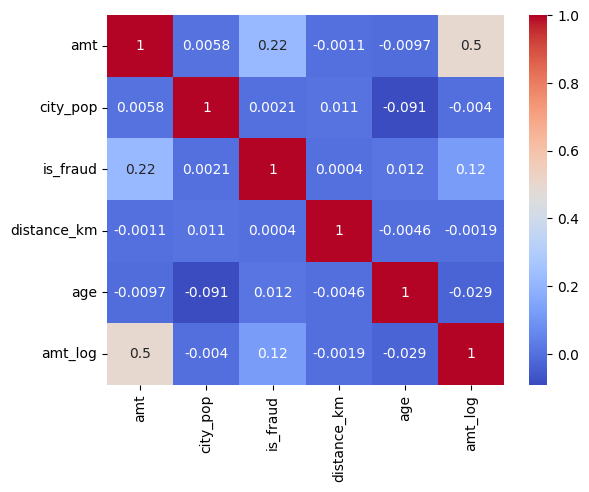

In [163]:
#compute correlations
correlation_matrix = dftrain.corr(numeric_only=True)
correlation_matrix

sns.heatmap(correlation_matrix, 
            annot=True, #put numbers of correlation 
            cmap='coolwarm')
plt.show()


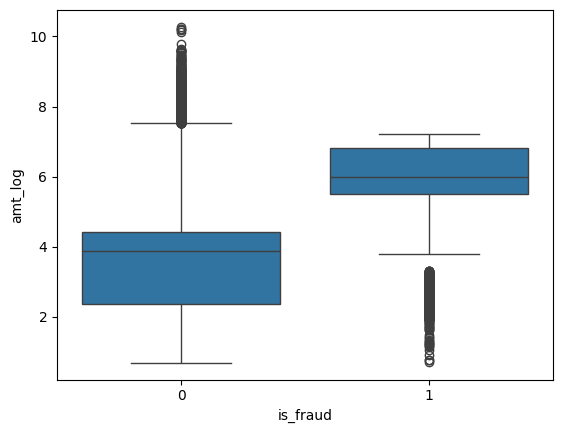

In [179]:
sns.boxplot(data=dftrain, x='is_fraud', y='amt_log')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23440\1856028952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dftrain[dftrain.is_fraud == 1].US_region,data=dftrain,palette="husl")


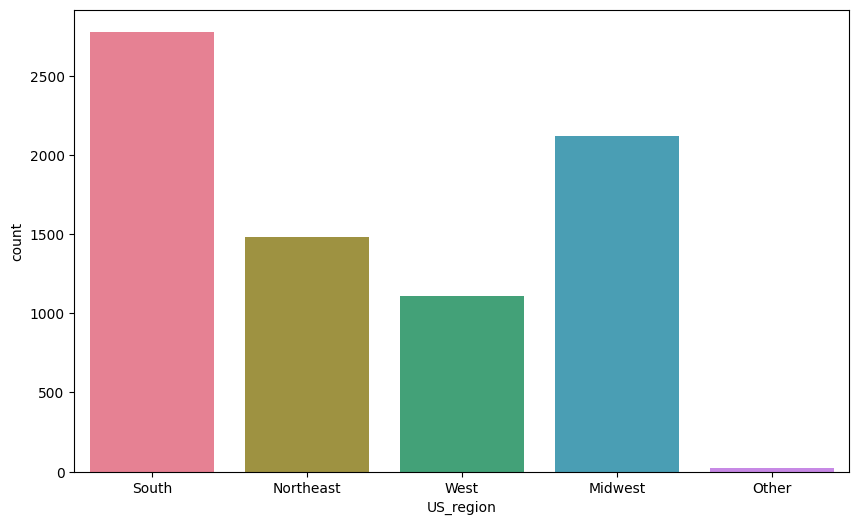

In [172]:
# countplots
plt.figure(figsize=(10,6))
sns.countplot(x=dftrain[dftrain.is_fraud == 1].US_region,data=dftrain,palette="husl")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_23440\191062698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dftrain[dftrain.is_fraud == 1].category,data=dftrain,palette="husl",


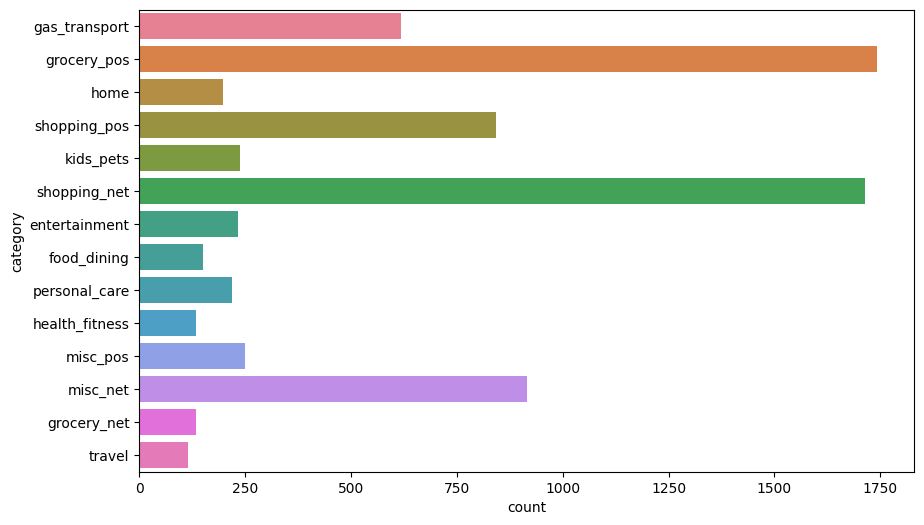

In [178]:
# countplots
plt.figure(figsize=(10,6))
sns.countplot(y=dftrain[dftrain.is_fraud == 1].category,data=dftrain,palette="husl",
              order=dftrain['category'].value_counts().index)
plt.show()

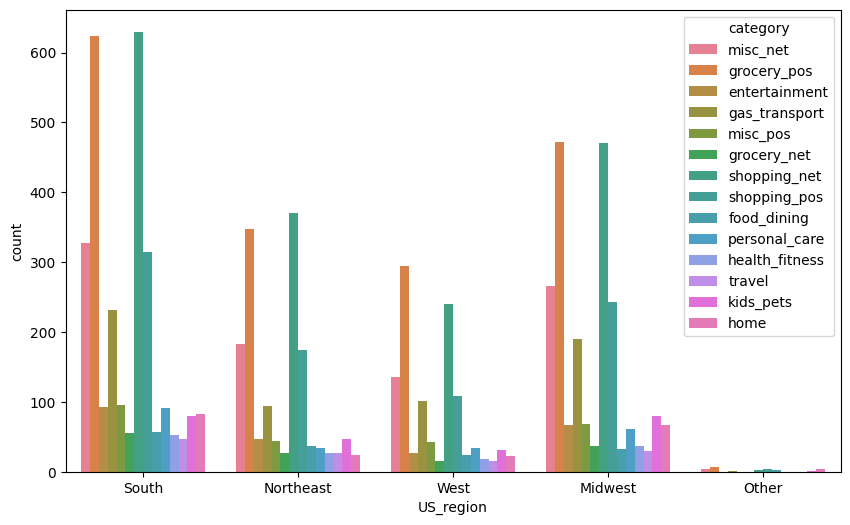

In [171]:
# countplots
plt.figure(figsize=(10,6))
sns.countplot(x=dftrain[dftrain.is_fraud == 1].US_region,data=dftrain,palette="husl",
              hue="category")
plt.show()

In [168]:
dftrain.head()

,category,amt,gender,city_pop,is_fraud,distance_km,age,US_region,amt_log
0,misc_net,4.97,F,3495,0,78.597568,31,South,1.786747
1,grocery_pos,107.23,F,149,0,30.212176,41,West,4.684259
2,entertainment,220.11,M,4154,0,108.206083,57,West,5.398660
3,gas_transport,45.00,M,1939,0,95.673231,52,West,3.828641
4,misc_pos,41.96,M,99,0,77.556744,33,South,3.760269


# 5. PREPROCESSING BEFORE MODELLING

## 5.0 Creating the Dataset for inputing into the model

In [182]:
y = dftrain[['is_fraud']]
y.value_counts()

is_fraud
0           1289169
1              7506
Name: count, dtype: int64

In [185]:
MT1 = dftrain.drop(columns=['is_fraud', 'amt_log']) # without log // for models with trees
MT2 = dftrain.drop(columns=['is_fraud', 'amt']) # with log amount // for lineal models
print(MT1)

              category     amt gender  city_pop  distance_km  age US_region
0             misc_net    4.97      F      3495    78.597568   31     South
1          grocery_pos  107.23      F       149    30.212176   41      West
2        entertainment  220.11      M      4154   108.206083   57      West
3        gas_transport   45.00      M      1939    95.673231   52      West
4             misc_pos   41.96      M        99    77.556744   33     South
...                ...     ...    ...       ...          ...  ...       ...
1296670  entertainment   15.56      M       258   119.752136   59      West
1296671    food_dining   51.70      M       100    75.104085   41     South
1296672    food_dining  105.93      M       899    99.047734   53      West
1296673    food_dining   74.90      M      1126    84.627652   40   Midwest
1296674    food_dining    4.30      M       218    83.853655   25      West

[1296675 rows x 7 columns]


## 5.1 Encoding Categorical Features

In [187]:
X1 = pd.get_dummies(MT1, columns=['category', 'gender', 'US_region'])
X2 = pd.get_dummies(MT2, columns=['category', 'gender', 'US_region'])
print(X2)

         city_pop  distance_km  age   amt_log  category_entertainment  \
0            3495    78.597568   31  1.786747                   False   
1             149    30.212176   41  4.684259                   False   
2            4154   108.206083   57  5.398660                    True   
3            1939    95.673231   52  3.828641                   False   
4              99    77.556744   33  3.760269                   False   
...           ...          ...  ...       ...                     ...   
1296670       258   119.752136   59  2.806990                    True   
1296671       100    75.104085   41  3.964615                   False   
1296672       899    99.047734   53  4.672174                   False   
1296673      1126    84.627652   40  4.329417                   False   
1296674       218    83.853655   25  1.667707                   False   

         category_food_dining  category_gas_transport  category_grocery_net  \
0                       False               

In [188]:
X1.head()

,amt,city_pop,distance_km,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,US_region_Midwest,US_region_Northeast,US_region_Other,US_region_South,US_region_West
0,4.97,3495,78.597568,31,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,107.23,149,30.212176,41,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,220.11,4154,108.206083,57,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,45.00,1939,95.673231,52,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,41.96,99,77.556744,33,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


## 5.2 Divide into Train and Test Set

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42, shuffle=True)

## 5.3 Scaling Numerical Features

In [191]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler_X = StandardScaler()
# first, we need to fit the scaler with the train dataset
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

# 6. MODELLING

## MODEL: Random Forest

### 6.1 Construct the Model

In [192]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier(n_estimators=100, class_weight='balanced', #for unbalanced dataset
                                 random_state=42)
rfModel.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 6.2 Evaluate the Model

In [ ]:
""" from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(rfModel, X_train, y_train, cv=5, scoring='f1') 
print(scores_rf.mean(), scores_rf.std()) """

In [ ]:
predictRF = rfModel.predict(X_test)
predictProbaRF = rfModel.predict_proba(X_test)[:, 1] 
predictProbaRF

In [236]:
importances = rfModel.feature_importances_
columns = X1.columns

# Creamos un DataFrame ordenado
feat_imp_rf = pd.DataFrame({
    'feature': columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp_rf)

                    feature  importance
0                       amt    0.689931
3                       age    0.041289
1                  city_pop    0.035380
2               distance_km    0.033793
15    category_shopping_net    0.030445
6    category_gas_transport    0.029699
8      category_grocery_pos    0.020589
10            category_home    0.014752
5      category_food_dining    0.013078
16    category_shopping_pos    0.011122
12        category_misc_net    0.010985
4    category_entertainment    0.008214
11       category_kids_pets    0.007649
13        category_misc_pos    0.007552
17          category_travel    0.007548
7      category_grocery_net    0.007402
9   category_health_fitness    0.007049
19                 gender_M    0.005398
14   category_personal_care    0.005156
18                 gender_F    0.004847
20        US_region_Midwest    0.002035
23          US_region_South    0.002024
21      US_region_Northeast    0.002016
24           US_region_West    0.001788


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print("Confusion Matrix: \n", confusion_matrix(y_test, predictRF))
print("Classification Report: \n", classification_report(y_test, predictRF))
print("ROC AUC Score: \n", roc_auc_score(y_test, predictProbaRF))

Confusion Matrix: 
 [[257652    163]
 [   521    999]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.86      0.66      0.74      1520

    accuracy                           1.00    259335
   macro avg       0.93      0.83      0.87    259335
weighted avg       1.00      1.00      1.00    259335

ROC AUC Score: 
 0.9764296103795358


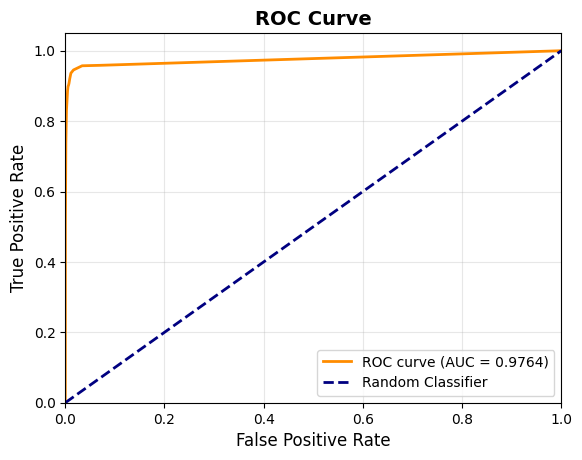

In [209]:
from sklearn.metrics import roc_curve, auc

# --- 5.2 ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(y_test, predictProbaRF)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
                label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

## MODEL: XGBoost

### 6.1 Construct the model

In [210]:
n_pos = sum(dftrain.is_fraud == 1)
n_neg = sum(dftrain.is_fraud == 0)

n_neg / n_pos

171.75179856115108

In [220]:
import xgboost as xgb

xgbModel = xgb.XGBClassifier(objective="binary:logistic", random_state=42,
                             tree_method="hist", early_stopping_rounds=20,
                             scale_pos_weight = n_neg / n_pos,
                             eval_metric="auc")

xgbModel.fit(X_train,y_train, eval_set=[(X_test, y_test)],verbose=True)

[0]	validation_0-auc:0.97955
[1]	validation_0-auc:0.98267
[2]	validation_0-auc:0.98851
[3]	validation_0-auc:0.98939
[4]	validation_0-auc:0.99122
[5]	validation_0-auc:0.99258
[6]	validation_0-auc:0.99349
[7]	validation_0-auc:0.99392
[8]	validation_0-auc:0.99416
[9]	validation_0-auc:0.99440
[10]	validation_0-auc:0.99456
[11]	validation_0-auc:0.99473
[12]	validation_0-auc:0.99484
[13]	validation_0-auc:0.99484
[14]	validation_0-auc:0.99504
[15]	validation_0-auc:0.99505
[16]	validation_0-auc:0.99505
[17]	validation_0-auc:0.99542
[18]	validation_0-auc:0.99570
[19]	validation_0-auc:0.99576
[20]	validation_0-auc:0.99576
[21]	validation_0-auc:0.99575
[22]	validation_0-auc:0.99587
[23]	validation_0-auc:0.99587
[24]	validation_0-auc:0.99590
[25]	validation_0-auc:0.99601
[26]	validation_0-auc:0.99608
[27]	validation_0-auc:0.99616
[28]	validation_0-auc:0.99617
[29]	validation_0-auc:0.99620
[30]	validation_0-auc:0.99624
[31]	validation_0-auc:0.99629
[32]	validation_0-auc:0.99632
[33]	validation_0-au

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,'auc'


### 6.2 Evaluate the model

In [221]:
predictXGB = xgbModel.predict(X_test)
predictXGB_proba = xgbModel.predict_proba(X_test)[:, 1] 

In [235]:
importances = xgbModel.feature_importances_
columns = X1.columns

# Creamos un DataFrame ordenado
feat_imp_xgb = pd.DataFrame({
    'feature': columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp_xgb)

                    feature  importance
6    category_gas_transport    0.260885
0                       amt    0.113582
10            category_home    0.087064
5      category_food_dining    0.068707
4    category_entertainment    0.061443
17          category_travel    0.052762
15    category_shopping_net    0.052290
7      category_grocery_net    0.045630
16    category_shopping_pos    0.045592
8      category_grocery_pos    0.040053
12        category_misc_net    0.039429
13        category_misc_pos    0.033276
14   category_personal_care    0.029248
11       category_kids_pets    0.014900
9   category_health_fitness    0.011985
3                       age    0.007477
18                 gender_F    0.006701
21      US_region_Northeast    0.006022
1                  city_pop    0.005455
23          US_region_South    0.004455
20        US_region_Midwest    0.003668
24           US_region_West    0.003373
2               distance_km    0.003314
22          US_region_Other    0.002688


In [222]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print("Confusion Matrix: \n", confusion_matrix(y_test, predictXGB))
print("Classification Report: \n", classification_report(y_test, predictXGB))
print("ROC AUC Score: \n", roc_auc_score(y_test, predictXGB_proba))

Confusion Matrix: 
 [[252458   5357]
 [    57   1463]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    257815
           1       0.21      0.96      0.35      1520

    accuracy                           0.98    259335
   macro avg       0.61      0.97      0.67    259335
weighted avg       1.00      0.98      0.99    259335

ROC AUC Score: 
 0.9967275162626813


In [225]:
## let's get the threshold más alto
#y_pred_custom = (predictXGB_proba > 0.80).astype(int)
y_pred_custom = (predictXGB_proba > 0.20).astype(int)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report: \n", classification_report(y_test, y_pred_custom))
print("ROC AUC Score: \n", roc_auc_score(y_test, predictXGB_proba))

Confusion Matrix: 
 [[247978   9837]
 [    32   1488]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    257815
           1       0.13      0.98      0.23      1520

    accuracy                           0.96    259335
   macro avg       0.57      0.97      0.61    259335
weighted avg       0.99      0.96      0.98    259335

ROC AUC Score: 
 0.9967275162626813


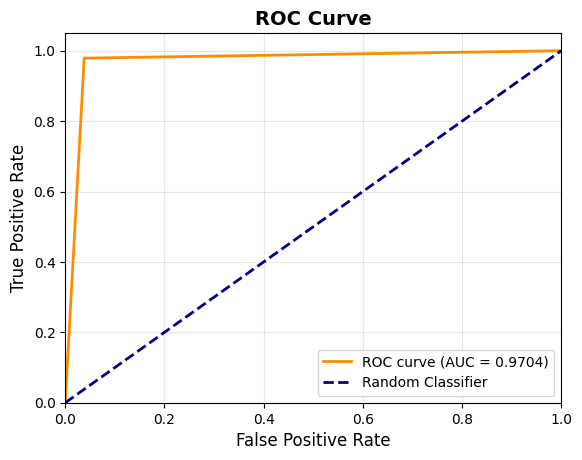

In [226]:
from sklearn.metrics import roc_curve, auc

# --- 5.2 ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_custom)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
                label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# 7. Conclussions and Erase the Dataset

 - XGBoost is better at the moment because it has almost perfect recall and a very high AUC. This means capture better the Frauds and only categorizing as legit transactions to a very low quantity.
 - The execution time of XGBoost is considerably high in comparison to Random Forest, from 13.2s to 4.58min or 298s, or x22 times faster.




In [227]:
# Erase the zip
import os
os.remove('./Data/fraud-detection.zip')